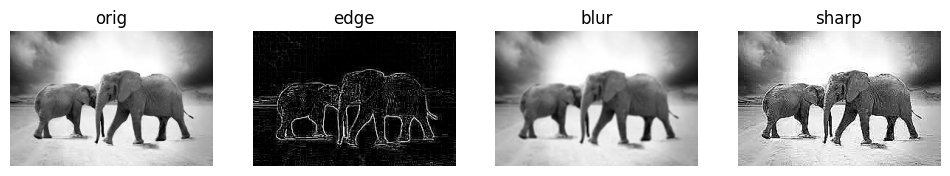

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def to_gray(img):
    if img.mode != "L":
        img = img.convert("L")
    return np.array(img, dtype=np.float32)

def conv(img, kernel):
    h, w = img.shape
    k = kernel.shape[0]
    pad = k // 2
    padded = np.pad(img, pad, mode="edge") # add zero padding on the edges
    out = np.zeros_like(img) # create array of zeros with same shape as img
    for y in range(h):
        for x in range(w):
            patch = padded[y:y+k, x:x+k] # selecting the 3x3 part of the image
            out[y, x] = (patch * kernel).sum()
    out = np.clip(out, 0, 255) # make sure pixel values are between 0 and 255
    return out

img = Image.open("images.jpg")
img = to_gray(img)

edge = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]], dtype = np.float32)

blur = (1/9.0) * np.ones((3,3), dtype=np.float32)

sharp = np.array([[ 0,-1,0],
                    [ -1, 5,-1],
                    [ 0,-1, 0]], dtype=np.float32)

g_edge = conv(img, edge)
g_blur = conv(img, blur)
g_sharp = conv(img, sharp)

fig, axs = plt.subplots(1, 4, figsize = (12, 3))
for ax, arr, title in zip(axs, [img, g_edge, g_blur, g_sharp], ["orig", "edge", "blur", "sharp"]):
    ax.imshow(arr, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.show()

In [4]:
import torch
import torch.nn as nn
import numpy as np

# Yann LeCun
x = torch.zeros(1, 1, 6, 6)
x[:, :, 2:4, 2:4] = 1.0
print("Input map:\n", x[0,0])

edge = torch.tensor([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]], dtype = torch.float32)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
with torch.no_grad():
    conv.weight.copy_(edge)

y = conv(x)
print("Output map y:\n", y[0,0])

relu = nn.ReLU()
pool = nn.MaxPool2d(2)
yr = relu(y)
yp = pool(yr)
print("ReLU(y):\n", yr[0,0])
print("Pooled:\n", yp[0,0])

Input map:
 tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
Output map y:
 tensor([[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1., -2., -2., -1.,  0.],
        [ 0., -2.,  5.,  5., -2.,  0.],
        [ 0., -2.,  5.,  5., -2.,  0.],
        [ 0., -1., -2., -2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.]], grad_fn=<SelectBackward0>)
ReLU(y):
 tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 5., 5., 0., 0.],
        [0., 0., 5., 5., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]], grad_fn=<SelectBackward0>)
Pooled:
 tensor([[0., 0., 0.],
        [0., 5., 0.],
        [0., 0., 0.]], grad_fn=<SelectBackward0>)
